# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


### Lo stato fondamentale di una particella in una doppi
In questa lezione abbiamo affrontato il problema di trovare lo stato fondamentale dell'Hamiltoniano 
\begin{eqnarray}
H=\frac{p^2}{2m}+x^4-\frac{5}{2}x^2
\end{eqnarray}
che descrive una particella quantistica in doppia buca di potenziale.

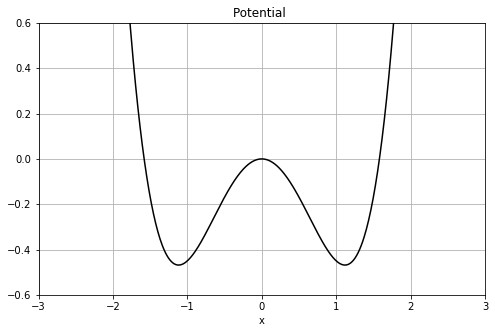

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
def Psi(x, mu, sigma,psi0):
    return psi0*(np.exp(-0.5*((x - mu) / sigma)**2) +np.exp(-0.5*((x + mu) / sigma)**2)) 

x = np.linspace(-a/2, a/2, N)
V = Vpot(x)

plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") 
plt.title("Potential ")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Si tratta di un problema di meccanica quantistica elementare, che trova applicazione ad esempio nella descrizione della dinamica della molecola di ammoniaca. Qui, infatti, un atomo di sodio è vincolato a muoversi in una doppia buca di potenziale creata dagli atomi di idrogeno circostanti.

![Image Title](https://readingpenrose.files.wordpress.com/2015/11/capture2.gif)

### Problem: find the ground state
Finding the ground state of the single-particle hamiltonian
\begin{eqnarray}
H=\frac{p^2}{2m}+x^4-\frac{5}{2}x^2
\end{eqnarray}
amounts to finding the minimum of the function 
\begin{eqnarray}
H(\mu,\sigma)
    &=&\int_{-\infty}^\infty
    \Psi^{\mu,\sigma}(x)^*
    \left(\frac{p^2}{2m}+x^4-\frac{5}{2}x^2\right)
    \Psi^{\mu,\sigma}(x)dx\\
    ~
    &=&\int_{-\infty}^\infty
    \Psi^{\mu,\sigma}(x)^*
    \left(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}+x^4-\frac{5}{2}x^2\right)
    \Psi^{\mu,\sigma}(x)dx\\
    ~
    &=&\int_{-\infty}^\infty
    \Psi^{\mu,\sigma}(x)^*
    \left(-\frac{1}{2}\frac{d^2}{dx^2}+x^4-\frac{5}{2}x^2\right)
    \Psi^{\mu,\sigma}(x)dx\\
    ~
    &=&-\frac{1}{2}\int_{-\infty}^\infty
    \{\Psi^{\mu,\sigma~*}\Psi^{\mu,\sigma}~''
    +(-2x^4+5x^2)|\Psi^{\mu,\sigma}|^2\}dx
\end{eqnarray}
on the space all the possible functions $\Psi(x)$ that are square integrable with $\int|\Psi|^2dx=1$.

Observe the potential. It has two minima. Physically, we suppose that in ground state the particle will have zero speed, so it will be on average in one of the minima with equal probability. Thus we chose the following test function:
$$
\Psi^{\mu,\sigma}(x) =\Psi_0\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)
$$
where $\mu$ is the absolute position of the two minima, and $\sigma>0$ is proportional to the width of the well. To give $\int|\Psi|^2dx=1$, $\Psi_0$ has to satisfy
\begin{eqnarray}
\Psi_0^{-1}&=& \int_{-\infty}^\infty\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)^2dx\\
~
&=&3.54491~\sigma~(1+e^{-\frac{\mu^2}{\sigma^2}})
\end{eqnarray} 
(integral calculated with Wolphram Mathematica).

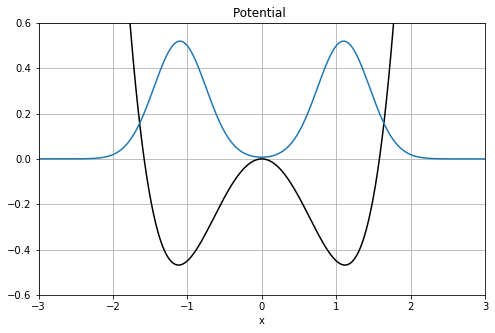

In [74]:
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential")
plt.plot(x,Psi(x,1.1,0.35,0.52))
plt.title("Potential ")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Sempre usando Mathematica, ottengo

\begin{eqnarray}
\Psi^{\mu,\sigma}(x)''&=&
\frac{1}{\sigma^4}\Bigg\{\Psi^{\mu,\sigma}(x)~(\mu^2-\sigma^2+x^2)+
~
-2\mu x
~
\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}}-e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)\Bigg\}\\
~
&=&\frac{1}{\sigma^4}~\Psi^{\mu,\sigma}(x)~\Bigg\{\mu^2-\sigma^2+x^2-2~\mu ~x~\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)\Bigg\}
\end{eqnarray} 
dove abbiamo usato l'utile identità:
\begin{eqnarray}
\frac{
     e^{-\frac{(x-\mu)^2}{2\sigma^2}}-
    e^{-\frac{(x+\mu)^2}{2\sigma^2}}
}{
     e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
    e^{-\frac{(x+\mu)^2}{2\sigma^2}}
}=\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)
\end{eqnarray}




Pertanto, si ha
\begin{eqnarray}
H(\mu,\sigma)&=&-\frac{1}{2}\int_{-\infty}^\infty
    \{\Psi^{\mu,\sigma~*}\Psi^{\mu,\sigma}~''
    +(-2x^4+5x^2)|\Psi^{\mu,\sigma}|^2\}dx\\
    ~
    &=&-\frac{1}{2}\int_{-\infty}^\infty
     |\Psi^{\mu,\sigma}|^2
     \Bigg\{\sigma^{-4}
    \Bigg( \mu^2-\sigma^2+x^2-2~\mu ~x~\text{tanh}
      \left(\frac{\mu x}{\sigma^2}\right)\Bigg)
        -2x^4+5x^2\Bigg) 
       \Bigg\}
   dx\\
   ~
   &=&\frac{\sigma^2-\mu^2}{2\sigma^4}+\int_{-\infty}^\infty
   |\Psi^{\mu,\sigma}|^2
   \Bigg(
   x^4-\frac{5+\sigma^{-4}}{2}x^2+
   \frac{\mu x}{\sigma^4}\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)
   \Bigg)dx\\
   ~
   &=&\frac{\sigma^2-\mu^2}{2\sigma^4}+
   \frac{0.282095}{\sigma(1+e^{-\mu^2/\sigma^2})}
   \int_{-\infty}^\infty
   \left( e^{-\frac{(x-\mu)^2}{\sigma^2}}+
   e^{-\frac{(x+\mu)^2}{\sigma^2}}
  + e^{-\frac{x^2+\mu^2}{\sigma^2}}
   \right)\cdot\\&&\cdot
   \Bigg(
   x^4-\frac{5+\sigma^{-4}}{2}x^2+
   \frac{\mu x}{\sigma^4}\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)
   \Bigg)dx
\end{eqnarray}

Si tratta dunque di trovare il valore minimo della funzione costo $H(\mu,\sigma)$ nei parametri $\mu$ e $\sigma$.
Dal momento che disegnarla punto per punto è troppo costoso computazionalmente, vi sono algoritmi che permettono di esplorare il landscape in modo efficiente.
